In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")

In [7]:
dir = r"/home/bruno/Documentos/mba_usp/arvores_redes_ensemble_models_2/Arquivos e scripts 27.06.23 - Atualizado/tips.csv"
df = pd.read_csv(dir).drop(columns="Unnamed: 0")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df["pct_tip"] = df.tip / df.total_bill
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


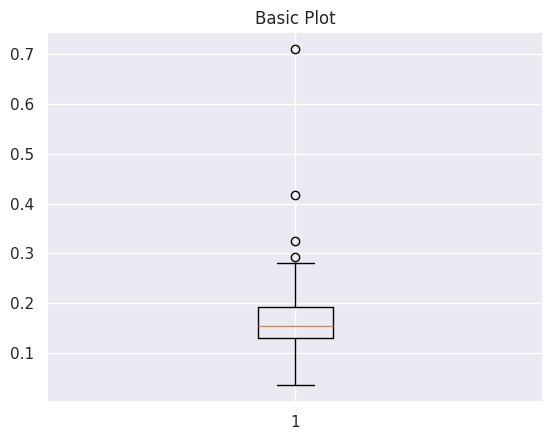

In [68]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.pct_tip);

<Axes: xlabel='sex', ylabel='count'>

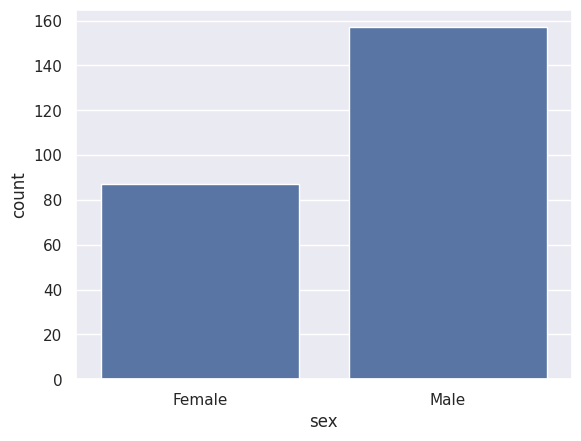

In [69]:
sns.countplot(df, x="sex")

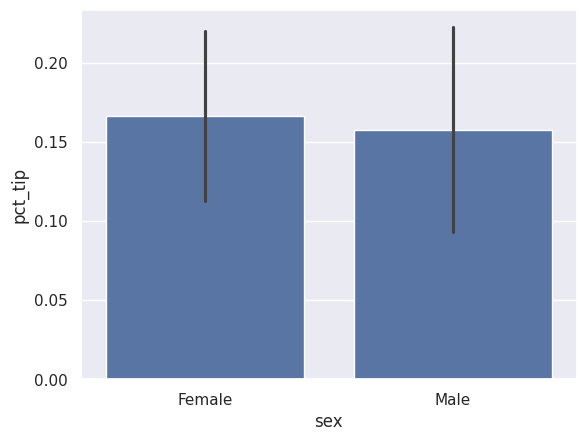

In [70]:
sns.barplot(data=df, x="sex", y="pct_tip", errorbar="sd");